In [2]:
import torch
import constants
import torch
import importlib

from dataloaders.NYU_loader import get_dataloaders
device = constants.DEVICE

test_dl, train_dl = get_dataloaders(batch_size=16)

data = next(iter(test_dl))

img, mask = data[:2]

print(img.shape, mask.shape)



torch.Size([16, 3, 512, 512]) torch.Size([16, 1, 512, 512])


In [ ]:
del test_dl
del train_dl


In [3]:
import gc
gc.collect()

0

In [15]:
import utils.utils as utils
importlib.reload(utils)

one_hot = utils.convert_to_one_hot(mask, 13)

print(one_hot.shape)

segmentation = utils.convert_to_segmentation(one_hot)

print(segmentation.shape)


vals
tensor([0.0000, 0.0769, 0.0833, 0.1538, 0.1667, 0.2308, 0.2500, 0.3077, 0.3333,
        0.3846, 0.4167, 0.4615, 0.5000, 0.5385, 0.5833, 0.6154, 0.6667, 0.6923,
        0.7500, 0.7692, 0.8333, 0.8462, 0.9167, 0.9231, 1.0000])
torch.Size([16, 13, 512, 512])
torch.Size([16, 512, 512])


In [86]:
# check that one hot was properly encoeded

N = 0

for N in range(1):
  for row in range(mask.shape[2]):
    for col in range(mask.shape[3]): 
      seg_cls = mask[N, 0, row, col].long().item()
      assert one_hot[N, seg_cls, row, col] == 1

print("All good!")

AssertionError: 

In [16]:
import matplotlib.pyplot as plt
segmentation = segmentation[0].squeeze(0)

torch.Size([512, 512])
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


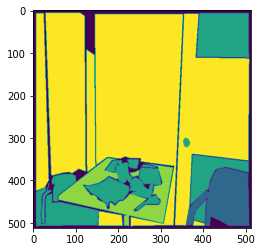

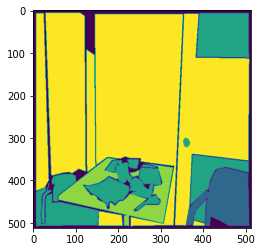

: 

In [18]:
print(segmentation.shape)

print(torch.unique( torch.round(mask * 12))) 
print(torch.unique(segmentation))
plt.figure()
plt.imshow(segmentation)

plt.figure()
plt.imshow(mask.squeeze(1)[0])